In [4]:
# this script shows how to request seimsic data from IRIS and plot the waveform with OBSPY

from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [33]:
client = Client("IRIS")
net = "IU"  # network of the station
sta = "ANMO"  # station code
loc = "00"  # to specify the instrument at the station
chan = "LHZ" # B=broadband frequency, H=velocity, Z=vertical component

In [34]:
eventTime = UTCDateTime("2010-02-27T06:45:04")
starttime = eventTime - 60  # 1 minute before the event
endtime = eventTime + 15 * 60  # 15 minutes after the event

In [35]:
myStream = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(myStream)

1 Trace(s) in Stream:
IU.ANMO.00.LHZ | 2010-02-27T06:44:04.069538Z - 2010-02-27T07:00:03.069538Z | 1.0 Hz, 960 samples


In [36]:
# myStream.plot()
myStream.plot(
    outfile="myStream.png",
    starttime=None,
    endtime=None,
    size=(800, 250),
    dpi=100,
    color="blue",
    bgcolor="white",
    face_color="white",
    transparent=False,
    number_of_ticks=6,
    tick_rotation=45,
    type="relative",
    linewidth=0.5,
    linestyle="-",
)

myStream.write("ANMO.mseed", format="MSEED")

In [12]:
st = read("bhn.mseed")
print(st)
tr= st[0]
data = tr.data
print(data)

print(tr.stats) #view the metadata 詮釋資料

1 Trace(s) in Stream:
IU.ANMO.00.LHZ | 2020-10-19T20:53:39.069538Z - 2020-10-19T21:09:38.069538Z | 1.0 Hz, 960 samples
[   959    797    718    984   1302   1238    903    651    717    944
    952   1022   1134    899    767    855    946   1119   1112    987
    666    589   1055   1215   1251   1044    516    533   1082   1249
    930   1001    927    695    953    897    965   1208    919    957
   1010    693    813   1031    817    937   1426    957    470    936
   1056   1050    925    573   1090   1410    873    667    696    875
   1181   1030   1029   1155    830    618    748   1122   1372   1087
    670    639    959   1007    926   1088   1144    939    556    701
   1183   1175   1111    899    633    886    947   1048   1217    898
   1003    847    436    787   1144   1447   1302    710    539    698
   1144   1437   1083    656    666    905   1064    955    960   1141
   1079    938    650    681   1253   1454   1117    664    505    753
   1073   1155   1113    966 

IU


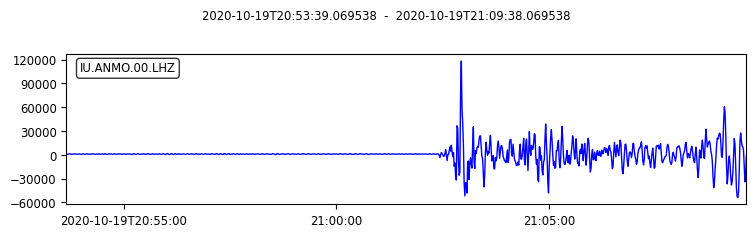

In [10]:
print(tr.stats.network)
tr.plot(color = 'blue');

In [37]:
# read multiple data: option1
st = read("ADK.mseed")
st += read("ANMO.mseed")
# st += read("myStream.mseed")
print(st)

2 Trace(s) in Stream:
IU.ADK.00.LHZ  | 2010-02-27T06:44:04.069538Z - 2010-02-27T07:00:03.069538Z | 1.0 Hz, 960 samples
IU.ANMO.00.LHZ | 2010-02-27T06:44:04.069538Z - 2010-02-27T07:00:03.069538Z | 1.0 Hz, 960 samples


2 Trace(s) in Stream:
IU.ADK.00.LHZ  | 2010-02-27T06:44:04.069538Z - 2010-02-27T07:00:03.069538Z | 1.0 Hz, 960 samples
IU.ANMO.00.LHZ | 2010-02-27T06:44:04.069538Z - 2010-02-27T07:00:03.069538Z | 1.0 Hz, 960 samples


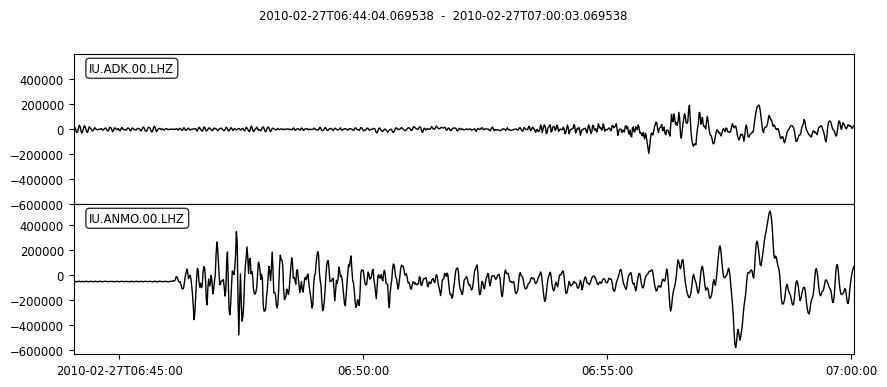

In [38]:
# read multiple data: option 2
tr1 = read("ADK.mseed")
tr2 = read("ANMO.mseed")
# tr3 = read("myStream.mseed")
st1 = tr1 + tr2
print(st1)
st1.plot(automerge='true', size=(900,400));